In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Try to understand the data**

In [2]:
trainingData= pd.read_csv('/kaggle/input/titanic/train.csv')
testingData=pd.read_csv('/kaggle/input/titanic/test.csv')
trainingData["trainTest"]=1
testingData["trainTest"]=0
testingData["survived"]=np.NaN
allData=pd.concat([trainingData,testingData])
%matplotlib inline
allData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'trainTest',
       'survived'],
      dtype='object')

In [3]:
#just showing the data types and see if there is any null values
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  trainTest    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
#getting some statistics about the data
trainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,trainTest
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
#The data is a mix of numeric variables and categorical variables so why don't we devide them
trainingNumericVar=trainingData[['Age','SibSp','Parch','Fare']] #we can use histograms to under stand this type of data
trainingCategorialVar=trainingData[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']] #we under stand this type of data by just counting the values

**Producing histogram for the numreic data**

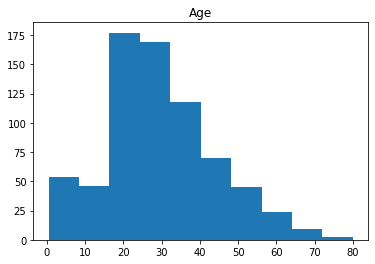

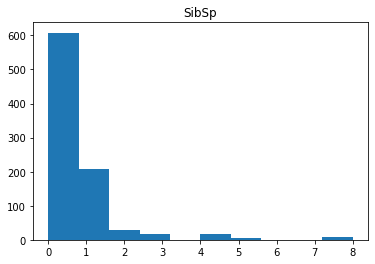

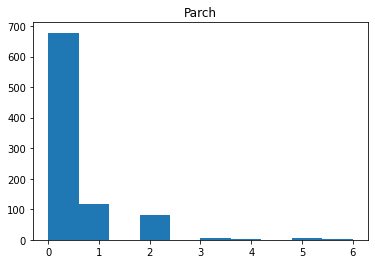

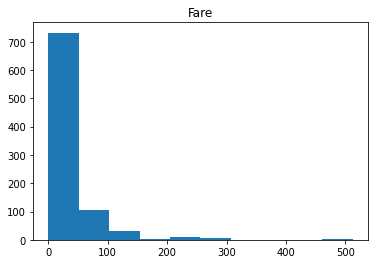

In [6]:
import matplotlib.pyplot as plt
for i in trainingNumericVar.columns:
    plt.hist(trainingNumericVar[i])
    plt.title(i)
    plt.show()

> **Commenting on histograms**

Age-->follow normal distribution
sibsp--> doesn't follow normal distribution
parch--> doesn't follow normal distribution
fare--> doesn't follow normal distribution

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

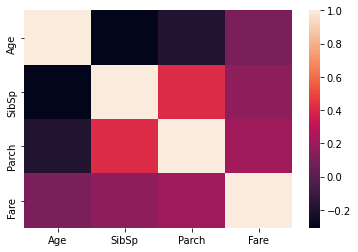

In [7]:
import seaborn as sns
print(trainingNumericVar.corr()) #correlation to see relations between variables
sns.heatmap(trainingNumericVar.corr()) #visulaizing the corelation

**commenting on the graph(heat map)**
* there is a negative correlation between the age and the number of sibbsp as one increase the other one decrease and vice versa
* we can also duduce from the correlation between sibsp and parch that families tends to travel togther


In [8]:
pd.pivot_table(trainingData, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


see the average value of each of this variables among people who survived and people who died, we can see that: 
* younger people had higher chance to survive  
* people who paid more also had higher chance
* if the child was accompanied by his parents have higher chance to survive
* if the pessanger has his children with him he would have less chance to survive

**Now we want to compare rate of servival among categorical values**

In [9]:
print(pd.pivot_table(trainingData, index='Survived',columns='Pclass', values='Ticket',aggfunc= 'count'))
print()
print(pd.pivot_table(trainingData, index='Survived',columns='Sex', values='Ticket',aggfunc= 'count'))
print()
print(pd.pivot_table(trainingData, index='Survived',columns='Embarked', values='Ticket',aggfunc= 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


**commenting on results **
1. more people survived from higher classes
2. more females survived
3. it seems that we can't get a usefull information from the emabrking place

# Some Feature Engineering

In [10]:
#spliting the tickets into two categories tickets with numbers and tickets which include letters
trainingData['numeric_ticket']=trainingData.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
trainingData['letter_ticket']=trainingData.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [11]:
trainingData['numeric_ticket'].value_counts()
#1 for tickets with numbers only
#0 for tickets which includes letters

1    661
0    230
Name: numeric_ticket, dtype: int64

In [12]:
pd.set_option("max_rows", None)
trainingData['letter_ticket'].value_counts()
#exploring ticket lettering conventions
#may be used in further analysis

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
wep            3
sopp           3
pp             3
swpp           2
sotono2        2
ppp            2
scah           2
fc             1
sca4           1
scow           1
sop            1
as             1
scahbasle      1
sp             1
fa             1
sc             1
casoton        1
Name: letter_ticket, dtype: int64

In [13]:
# let's see the person title,MR, MS, Master, Dr....
trainingData.Name.head(50)
trainingData['name_title']=trainingData.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [14]:
trainingData['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Sir               1
Don               1
Mme               1
Ms                1
Capt              1
the Countess      1
Lady              1
Name: name_title, dtype: int64

if we want to improve this we may join some titles togther into one categorie
also this exploration could be helpful if we want to see if the captin survived or not

# **Some data Processing**

In [15]:
#note i have joined the test and training data together to be eassier (I know it is not a good practise)
#categorial data for both training and test sets
allData['numeric_ticket']=allData.Ticket.apply(lambda x: 1 if x.isnumeric()else 0)
allData['letter_ticket']=allData.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower()if len(x.split(' ')[:-1])>0 else 0)
allData['name_title']=allData.Name.apply(lambda x: x.split (',')[1].split('.')[0].strip())

#remove null from continuous data
allData.Age=allData.Age.fillna(trainingData.Age.mean())
allData.Fare=allData.Fare.fillna(trainingData.Fare.mean())

#drop rows that have null embarked values
allData.dropna(subset=['Embarked'],inplace=True)

(889,)

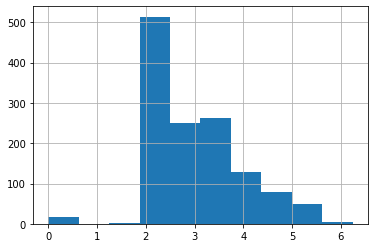

In [16]:
#normalize some data
#fare
allData['norm_fare']=np.log(allData.Fare+1)
allData['norm_fare'].hist()

#convert fare to category
allData.Pclass=allData.Pclass.astype(str)

#creating dummy variables using categories
allDummies=pd.get_dummies(allData[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','numeric_ticket','name_title','trainTest']])

#split to train and test again
xTrain = allDummies[allDummies.trainTest == 1].drop(['trainTest'], axis =1)
xTest = allDummies[allDummies.trainTest == 0].drop(['trainTest'], axis =1)


yTrain = allData[allData.trainTest==1].Survived
yTrain.shape

# **Selecting a model**

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,xTrain,yTrain,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.79775281 0.80337079 0.86440678]
0.8200723671681585


In [19]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,xTrain,yTrain,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.78089888 0.80898876 0.80898876 0.83050847]
0.7998095600837936


In [20]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,xTrain,yTrain,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.79213483 0.84269663 0.74719101 0.83050847]
0.8054275376118835


In [21]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf)], voting = 'soft') 

In [22]:
cv = cross_val_score(voting_clf,xTrain,yTrain,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.8258427  0.83707865 0.80337079 0.87570621]
0.8324446137243701


In [23]:
voting_clf.fit(xTrain,yTrain)
y_hat_base_vc = voting_clf.predict(xTest).astype(int)
basic_submission = {'PassengerId': testingData.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('MySubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [24]:
base_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
